In [ ]:
pip install tensorflow scikit-learn matplotlib seaborn


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


In [ ]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values (0-255 → 0-1)
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Flatten 28x28 images → 784 input features
x_train = x_train.reshape((x_train.shape[0], 28*28))
x_test = x_test.reshape((x_test.shape[0], 28*28))

# One-hot encode labels (0-9 → vector of length 10)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print("Training set:", x_train.shape, y_train.shape)
print("Testing set:", x_test.shape, y_test.shape)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training set: (60000, 784) (60000, 10)
Testing set: (10000, 784) (10000, 10)


In [ ]:
model = models.Sequential([
    layers.Dense(128, activation="relu", input_shape=(784,)),
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax")  # Output: 10 classes
])

# Compile model
model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train with validation split (20% from training data used for validation)
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2,
    verbose=2
)


Epoch 1/10
1500/1500 - 7s - 5ms/step - accuracy: 0.9233 - loss: 0.2587 - val_accuracy: 0.9624 - val_loss: 0.1309
Epoch 2/10
1500/1500 - 7s - 4ms/step - accuracy: 0.9668 - loss: 0.1097 - val_accuracy: 0.9663 - val_loss: 0.1083
Epoch 3/10
1500/1500 - 5s - 4ms/step - accuracy: 0.9770 - loss: 0.0743 - val_accuracy: 0.9732 - val_loss: 0.0917
Epoch 4/10
1500/1500 - 7s - 4ms/step - accuracy: 0.9824 - loss: 0.0548 - val_accuracy: 0.9747 - val_loss: 0.0951
Epoch 5/10
1500/1500 - 5s - 4ms/step - accuracy: 0.9853 - loss: 0.0435 - val_accuracy: 0.9758 - val_loss: 0.0864
Epoch 6/10
1500/1500 - 7s - 4ms/step - accuracy: 0.9897 - loss: 0.0333 - val_accuracy: 0.9722 - val_loss: 0.1033
Epoch 7/10
1500/1500 - 5s - 4ms/step - accuracy: 0.9906 - loss: 0.0284 - val_accuracy: 0.9745 - val_loss: 0.1018
Epoch 8/10
1500/1500 - 7s - 5ms/step - accuracy: 0.9924 - loss: 0.0229 - val_accuracy: 0.9769 - val_loss: 0.1026
Epoch 9/10
1500/1500 - 9s - 6ms/step - accuracy: 0.9926 - loss: 0.0216 - val_accuracy: 0.9739 - 

In [ ]:
# Accuracy on test set
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print("Test Accuracy:", test_acc)


Test Accuracy: 0.9754999876022339


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


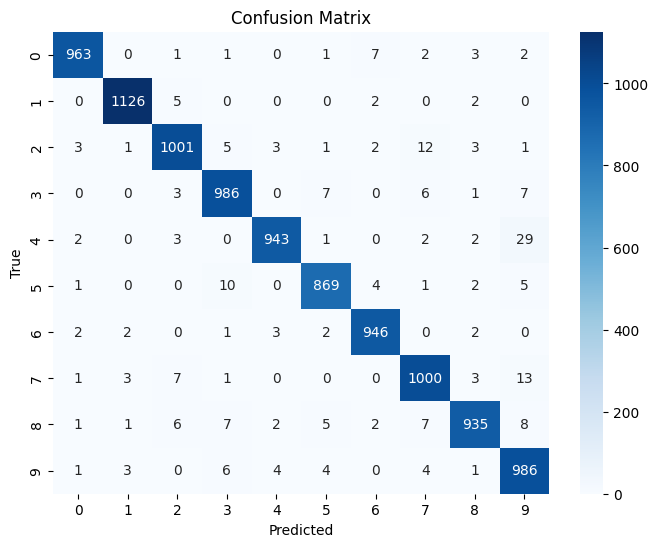

In [ ]:
# Predictions
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


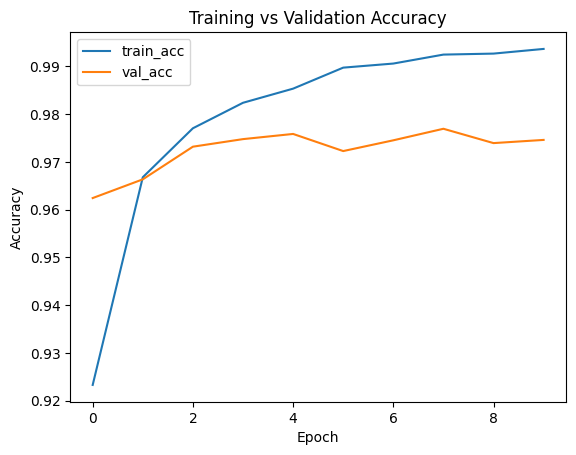

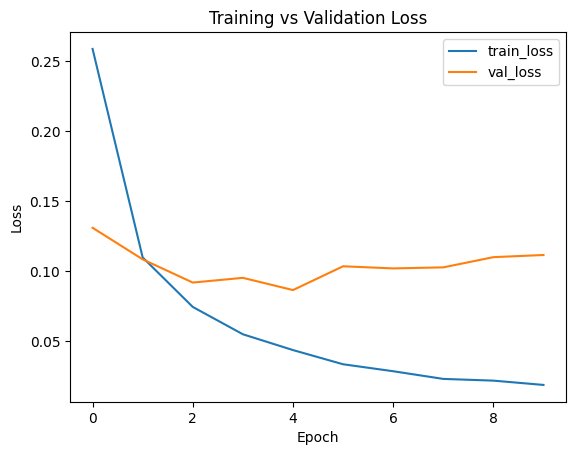

In [ ]:
# Accuracy plot
plt.plot(history.history["accuracy"], label="train_acc")
plt.plot(history.history["val_accuracy"], label="val_acc")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training vs Validation Accuracy")
plt.show()

# Loss plot
plt.plot(history.history["loss"], label="train_loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Training vs Validation Loss")
plt.show()


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True)

history = model.fit(
    x_train, y_train,
    epochs=50,  # higher, since early stopping will cut early
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=2
)


Epoch 1/50
1500/1500 - 7s - 5ms/step - accuracy: 0.9943 - loss: 0.0169 - val_accuracy: 0.9682 - val_loss: 0.1566
Epoch 2/50
1500/1500 - 6s - 4ms/step - accuracy: 0.9942 - loss: 0.0181 - val_accuracy: 0.9766 - val_loss: 0.1115
Epoch 3/50
1500/1500 - 7s - 5ms/step - accuracy: 0.9962 - loss: 0.0114 - val_accuracy: 0.9754 - val_loss: 0.1261
Epoch 4/50
1500/1500 - 5s - 4ms/step - accuracy: 0.9961 - loss: 0.0120 - val_accuracy: 0.9763 - val_loss: 0.1229
Epoch 5/50
1500/1500 - 7s - 4ms/step - accuracy: 0.9960 - loss: 0.0136 - val_accuracy: 0.9753 - val_loss: 0.1386
